In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [3]:
csv_dir = os.path.join('/home', 'sylli', 'Documents', 'MSAD-E', 'reports', 'unsupervised_05_2024')
save_fig_path = os.path.join(csv_dir, "figures")
metrics_path = os.path.join('/home', 'sylli', 'Documents', 'MSAD-E', 'data', 'metrics')

In [4]:
# Detectors
detector_names = [
	'AE', 
	'CNN', 
	'HBOS', 
	'IFOREST', 
	'IFOREST1', 
	'LOF', 
	'LSTM', 
	'MP', 
	'NORMA', 
	'OCSVM', 
	'PCA', 
	'POLY'
]

model_selectors = [
    "convnet128",
    "resnet1024",
    "sit512",
    "knn1024",
]

combine_methods = ['average', 'vote']

datasets = [
    'MGAB', 
    'GHL', 
    'MITDB', 
    'Genesis', 
    'OPPORTUNITY', 
    'SensorScope', 
    'KDD21', 
    'Occupancy', 
    'SVDB', 
    'IOPS', 
    'SMD', 
    'Daphnet',
    'ECG',
    'NAB',
    'YAHOO'
]

k_values = np.arange(1, 13)

# testsizes = [1]
# splits = []

In [5]:
def load_results(csv_file):
    """Load results from a CSV file."""
    return pd.read_csv(csv_file, index_col=0)

def percentage_change(old_value, new_value):
    """
    Calculate the percentage change between two values.
    
    Parameters:
        old_value (float): The old value.
        new_value (float): The new value.
        
    Returns:
        float: The percentage change.
    """
    return ((new_value - old_value) / old_value) * 100

def highlight_max(s):
    is_max = s == s.max() 
    return ['font-weight: bold; background: lightgreen' if cell else '' for cell in is_max] 

In [6]:
result_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]
for i in np.random.randint(low=0, high=len(result_files), size=3):
    print(result_files[i])

testsize_1_split_15_sit512_average_k10.csv
testsize_1_split_9_resnet1024_average_k8.csv
testsize_1_split_15_knn1024_average_k12.csv


In [7]:
all_results = []
curr_experiment_env = set()

for file in result_files:
    parts = file.split('_')

    if len(parts) != 7:
        print("STOP! THERE IS A MISTAKE WITH GROUPING THE FILES. FILE NAME HAS PROBABLY CHANGED. TAKE CARE")
    else:
        # Collect results information from filename
        testsize = parts[[i for i, x in enumerate(parts) if x == 'testsize'][0] + 1]
        split = parts[[i for i, x in enumerate(parts) if x == 'split'][0] + 1]
        model_selector = [x for x in parts if x in model_selectors][0]
        combine_method = [x for x in parts if x in combine_methods][0]
        k = int(parts[-1].split('.')[0][1:])

        # Read results
        curr_df = pd.read_csv(os.path.join(csv_dir, file))
        curr_df.rename(columns={'Unnamed: 0': 'Time series'}, inplace=True)

        # Save results info
        curr_df['Dataset'] = curr_df.apply(lambda x: x['Time series'].split('/')[0], axis=1)
        curr_df['Model Selector'] = model_selector
        curr_df['k'] = k
        curr_df['Combine Method'] = combine_method
        all_results.append(curr_df)

        # Update curr existing datasets, MSs, etc. 
        [curr_experiment_env.add(x) for x in curr_df['Dataset'].unique()]
        curr_experiment_env.add(model_selector)
        curr_experiment_env.add(combine_method)
        curr_experiment_env.add(k)

df = pd.concat(all_results)
# df.set_index('Time series', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Time series,AUC-PR,weight_AE,weight_CNN,weight_HBOS,weight_IFOREST,weight_IFOREST1,weight_LOF,weight_LSTM,weight_MP,weight_NORMA,weight_OCSVM,weight_PCA,weight_POLY,Dataset,Model Selector,k,Combine Method
0,KDD21/024_UCR_Anomaly_DISTORTEDInternalBleedin...,0.049921,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,KDD21,resnet1024,1,average
1,KDD21/037_UCR_Anomaly_DISTORTEDLab2Cmac011215E...,0.185835,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,KDD21,resnet1024,1,average
2,KDD21/016_UCR_Anomaly_DISTORTEDECG4_5000_16900...,0.851902,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,KDD21,resnet1024,1,average
3,KDD21/176_UCR_Anomaly_insectEPG4_1300_6508_655...,0.002506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,KDD21,resnet1024,1,average
4,KDD21/002_UCR_Anomaly_DISTORTED2sddb40_35000_5...,0.023225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,KDD21,resnet1024,1,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180667,YAHOO/YahooA3Benchmark-TS55_data.out,0.069652,0.001585,0.003256,0.037926,0.015893,0.008768,0.027602,0.000000,0.492754,0.010785,0.223746,0.087045,0.090639,YAHOO,sit512,11,average
180668,YAHOO/YahooA4Benchmark-TS18_data.out,0.031250,0.018339,0.000308,0.058147,0.107371,0.017763,0.030666,0.000000,0.301699,0.107878,0.023486,0.168705,0.165638,YAHOO,sit512,11,average
180669,YAHOO/YahooA3Benchmark-TS52_data.out,0.833945,0.000000,0.353791,0.001837,0.012544,0.004235,0.005530,0.007587,0.003115,0.010533,0.035804,0.009171,0.555853,YAHOO,sit512,11,average
180670,YAHOO/Yahoo_A1real_49_data.out,0.231481,0.076691,0.000243,0.123727,0.001102,0.003010,0.009355,0.000000,0.005164,0.155816,0.000307,0.624238,0.000348,YAHOO,sit512,11,average


In [8]:
# Read metrics
metrics_df = pd.read_csv(os.path.join(metrics_path, 'AVG_ENS', 'AUC_PR.csv'))
metrics_df.rename(columns={'Unnamed: 0': 'Time series'}, inplace=True)
metrics_df.set_index('Time series', inplace=True)
metrics_df

,AVG_ENS
Time series,
SVDB/891.test.csv@1.out,0.595038
SVDB/840.test.csv@1.out,0.412244
SVDB/886.test.csv@1.out,0.129495
SVDB/847.test.csv@2.out,0.445627
SVDB/807.test.csv@1.out,0.066535
...,...
MGAB/8.test.out,0.090769
MGAB/3.test.out,0.057343
MGAB/10.test.out,0.010871


In [9]:
df['AVG_ENS_AUC_PR'] = df.apply(lambda x: metrics_df.loc[x['Time series']], axis=1)
df

,Time series,AUC-PR,weight_AE,weight_CNN,weight_HBOS,weight_IFOREST,weight_IFOREST1,weight_LOF,weight_LSTM,weight_MP,weight_NORMA,weight_OCSVM,weight_PCA,weight_POLY,Dataset,Model Selector,k,Combine Method,AVG_ENS_AUC_PR
0,KDD21/024_UCR_Anomaly_DISTORTEDInternalBleedin...,0.049921,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,KDD21,resnet1024,1,average,0.049477
1,KDD21/037_UCR_Anomaly_DISTORTEDLab2Cmac011215E...,0.185835,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,KDD21,resnet1024,1,average,0.859794
2,KDD21/016_UCR_Anomaly_DISTORTEDECG4_5000_16900...,0.851902,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,KDD21,resnet1024,1,average,0.872759
3,KDD21/176_UCR_Anomaly_insectEPG4_1300_6508_655...,0.002506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,KDD21,resnet1024,1,average,0.170799
4,KDD21/002_UCR_Anomaly_DISTORTED2sddb40_35000_5...,0.023225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,KDD21,resnet1024,1,average,0.007892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180667,YAHOO/YahooA3Benchmark-TS55_data.out,0.069652,0.001585,0.003256,0.037926,0.015893,0.008768,0.027602,0.000000,0.492754,0.010785,0.223746,0.087045,0.090639,YAHOO,sit512,11,average,0.337163
180668,YAHOO/YahooA4Benchmark-TS18_data.out,0.031250,0.018339,0.000308,0.058147,0.107371,0.017763,0.030666,0.000000,0.301699,0.107878,0.023486,0.168705,0.165638,YAHOO,sit512,11,average,0.083333
180669,YAHOO/YahooA3Benchmark-TS52_data.out,0.833945,0.000000,0.353791,0.001837,0.012544,0.004235,0.005530,0.007587,0.003115,0.010533,0.035804,0.009171,0.555853,YAHOO,sit512,11,average,0.662070
180670,YAHOO/Yahoo_A1real_49_data.out,0.231481,0.076691,0.000243,0.123727,0.001102,0.003010,0.009355,0.000000,0.005164,0.155816,0.000307,0.624238,0.000348,YAHOO,sit512,11,average,1.000000


In [10]:
datasets = [x for x in datasets if x in curr_experiment_env]
model_selectors = [x for x in model_selectors if x in curr_experiment_env]
combine_methods = [x for x in combine_methods if x in curr_experiment_env]
k_values = [x for x in k_values if x in curr_experiment_env]

In [11]:
# Compute mean per dataset
mean_per_dataset = []
for combine_method in combine_methods:
    for model_selector in model_selectors:
        for dataset in datasets:
            mean_per_dataset.append({
                "Dataset": dataset,
                "Model Selector": model_selector,
                "Combine Method": combine_method,
                "AUC-PR": df[(df['Dataset'] == dataset) & (df["Model Selector"] == model_selector) & (df["Combine Method"] == combine_method)]['AUC-PR'].mean()
            })
df_to_plot = pd.DataFrame(mean_per_dataset)
df_to_plot

mean_per_dataset = []
for dataset in datasets:
    for k in k_values:
        for combine_method in combine_methods:
            for model_selector in model_selectors:
                mean_per_dataset.append({
                    "Dataset": dataset,
                    "Model Selector": model_selector,
                    "Combine Method": combine_method,
                    "k": k,
                    "AUC-PR": df[(df['Dataset'] == dataset) & (df['k'] == k) & (df["Model Selector"] == model_selector) & (df["Combine Method"] == combine_method)]['AUC-PR'].mean()
                })
means_df = pd.DataFrame(mean_per_dataset)
means_df.head(5)

,Dataset,Model Selector,Combine Method,k,AUC-PR
0,MGAB,convnet128,average,1,0.002422
1,MGAB,resnet1024,average,1,0.011589
2,MGAB,sit512,average,1,0.014204
3,MGAB,knn1024,average,1,0.011589
4,MGAB,convnet128,vote,1,0.002422


In [12]:
# Compute AVG-ENS average per dataset
avg_ens_means = []
for dataset in datasets:
    avg_ens_means.append({
        "Dataset": dataset,
        "AUC-PR": metrics_df.filter(like=dataset, axis=0).mean()[0]
    })
avg_ens_means_df = pd.DataFrame(avg_ens_means)

/tmp/ipykernel_18734/2550687021.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "AUC-PR": metrics_df.filter(like=dataset, axis=0).mean()[0]


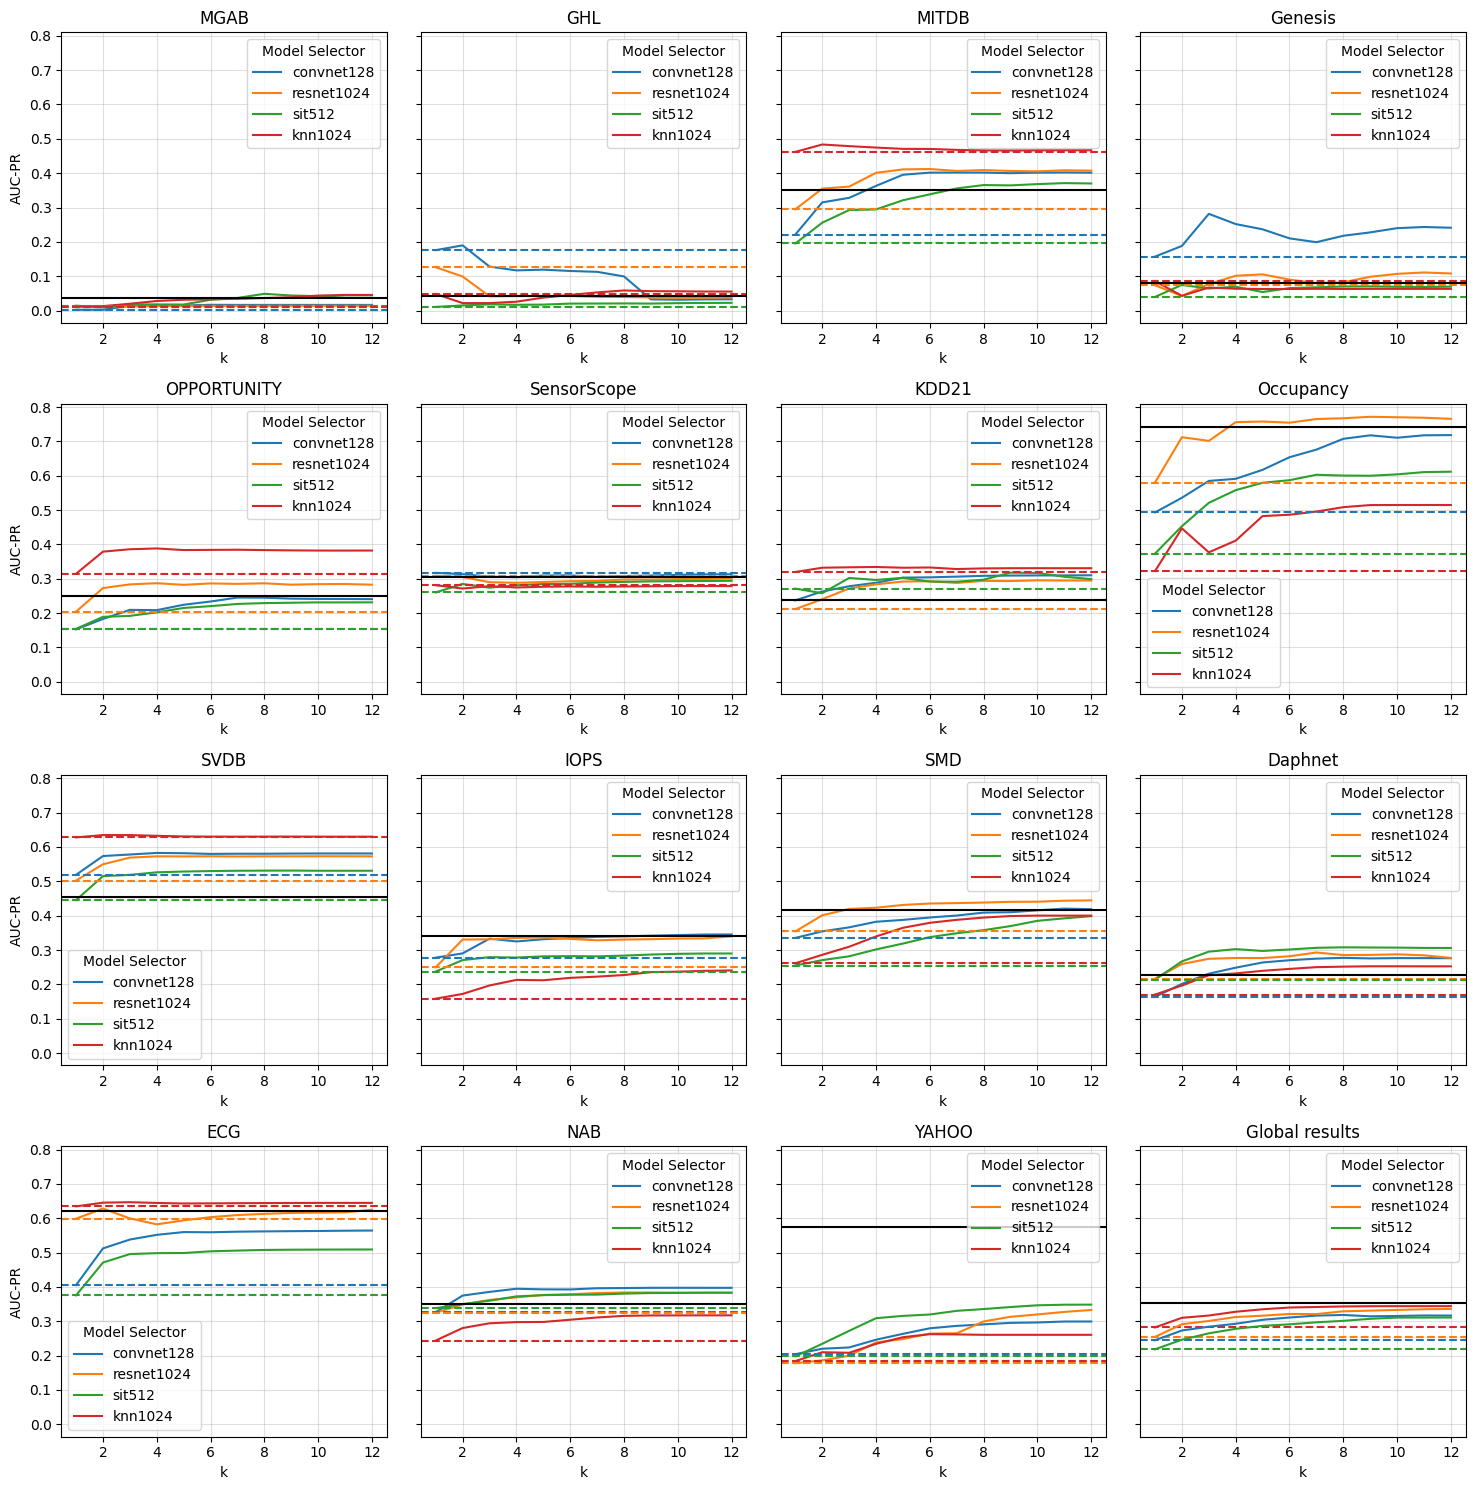

In [13]:
# Plot the AUC-PR values
fig, axes = plt.subplots(4, 4, figsize=(15, 15), sharey=True)
combine_method = 'average'

for i in range (0, len(datasets)):
    curr_data = df[(df["Dataset"] == datasets[i]) & (df["Combine Method"] == combine_method)]
    
    sns.lineplot(ax=axes[i//4, i % 4], data=curr_data, x="k", y="AUC-PR", hue="Model Selector", hue_order=model_selectors, errorbar=None)

    # Compute average for k = 1
    for j, ms in enumerate(model_selectors):
        curr_avg_k1 = curr_data[(curr_data["Model Selector"] == ms) & (curr_data["k"] == 1)]['AUC-PR'].mean()
        axes[i//4, i % 4].axhline(y=curr_avg_k1, color=f'C{j}', linestyle='dashed', label=f'{ms} k=1')

    # Compute average of AVG_ENS
    avg_avg_ens = curr_data[curr_data['k'] == 1]['AVG_ENS_AUC_PR'].mean()
    
    axes[i//4, i % 4].axhline(y=avg_avg_ens, color='black', label='AVG-ENS')
    axes[i//4, i % 4].grid(alpha=0.4)
    axes[i//4, i % 4].title.set_text(datasets[i])

# Compute global plot
curr_data = df[(df["Combine Method"] == combine_method)]

# Compute average for k = 1
for j, ms in enumerate(model_selectors):
    curr_avg_k1 = curr_data[(curr_data["Model Selector"] == ms) & (curr_data["k"] == 1)]['AUC-PR'].mean()
    axes[3, 3].axhline(y=curr_avg_k1, color=f'C{j}', linestyle='dashed')

# Compute average of AVG_ENS
avg_avg_ens = curr_data[curr_data['k'] == 1]['AVG_ENS_AUC_PR'].mean()

sns.lineplot(ax=axes[3, 3], data=curr_data, x="k", y="AUC-PR", hue="Model Selector", hue_order=model_selectors, errorbar=None)
axes[3, 3].axhline(y=avg_avg_ens, color='black', label='AVG-ENS')
axes[3, 3].grid(alpha=0.4)
axes[3, 3].title.set_text("Global results")

plt.tight_layout()
plt.show()

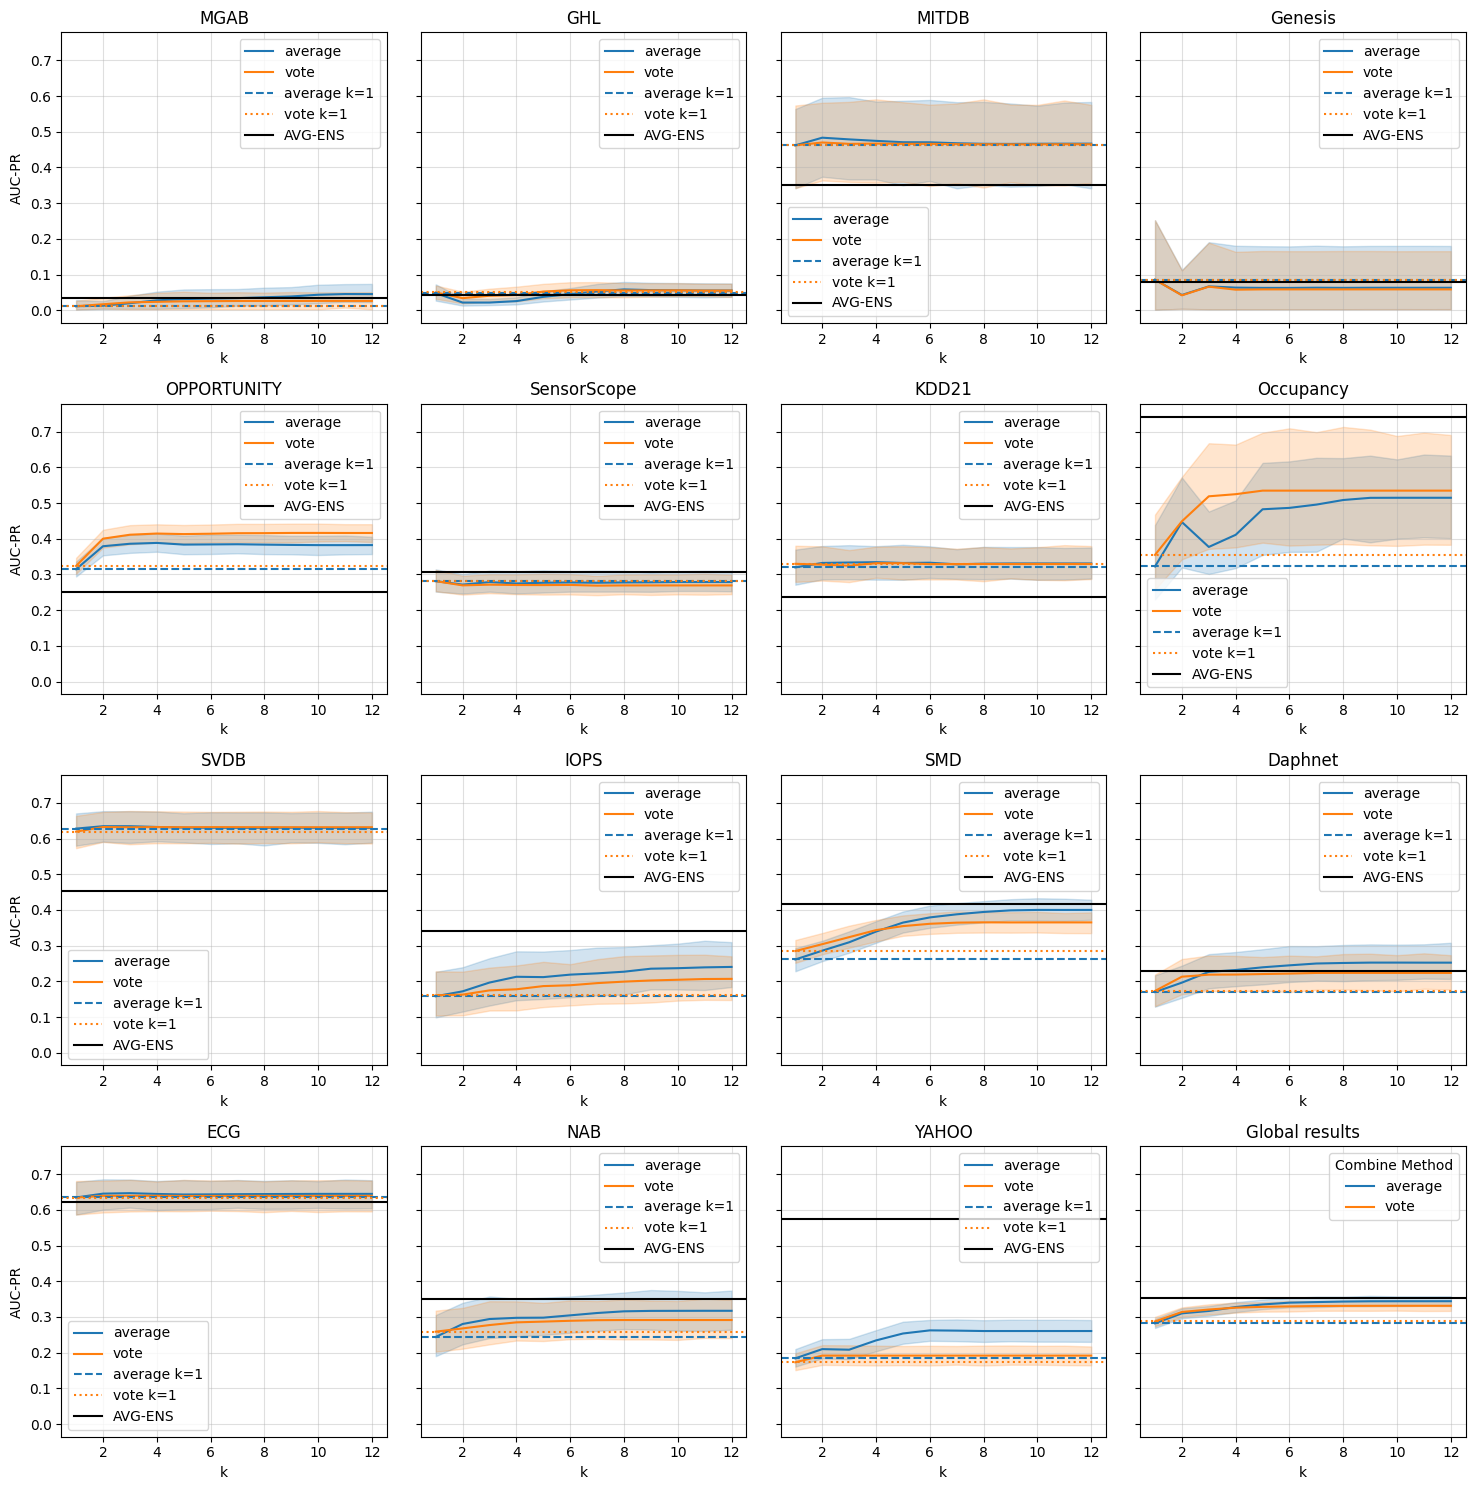

In [14]:
# Plot the AUC-PR values
fig, axes = plt.subplots(4, 4, figsize=(15, 15), sharey=True)
model_selector = [x for x in model_selectors if 'knn' in x][0]

for i in range (0, len(datasets)):
    curr_data = df[(df["Dataset"] == datasets[i]) & (df["Model Selector"] == model_selector)]

    # Compute average for k = 1
    avg_k_1_average = curr_data[(curr_data["Combine Method"] == 'average') & (curr_data["k"] == 1)]['AUC-PR'].mean()
    avg_k_1_vote = curr_data[(curr_data["Combine Method"] == 'vote') & (curr_data["k"] == 1)]['AUC-PR'].mean()

    # Compute average of AVG_ENS
    avg_avg_ens = curr_data[curr_data['k'] == 1]['AVG_ENS_AUC_PR'].mean()
    
    sns.lineplot(ax=axes[i//4, i % 4], data=curr_data, x="k", y="AUC-PR", hue="Combine Method", hue_order=combine_methods)
    axes[i//4, i % 4].axhline(y=avg_k_1_average, color='C0', linestyle='dashed', label='average k=1')
    axes[i//4, i % 4].axhline(y=avg_k_1_vote, color='C1', linestyle='dotted', label='vote k=1')
    axes[i//4, i % 4].axhline(y=avg_avg_ens, color='black', label='AVG-ENS')
    axes[i//4, i % 4].grid(alpha=0.4)
    axes[i//4, i % 4].title.set_text(datasets[i])
    axes[i//4, i % 4].legend()

# Compute global plot
curr_data = df[(df["Model Selector"] == model_selector)]

# Compute average for k = 1
avg_k_1_average = curr_data[(curr_data["Combine Method"] == 'average') & (curr_data["k"] == 1)]['AUC-PR'].mean()
avg_k_1_vote = curr_data[(curr_data["Combine Method"] == 'vote') & (curr_data["k"] == 1)]['AUC-PR'].mean()

# Compute average of AVG_ENS
avg_avg_ens = curr_data[curr_data['k'] == 1]['AVG_ENS_AUC_PR'].mean()

sns.lineplot(ax=axes[3, 3], data=curr_data, x="k", y="AUC-PR", hue="Combine Method", hue_order=combine_methods)
axes[3, 3].axhline(y=avg_k_1_average, color='C0', linestyle='dashed', label='average k=1')
axes[3, 3].axhline(y=avg_k_1_vote, color='C1', linestyle='dotted', label='vote k=1')
axes[3, 3].axhline(y=avg_avg_ens, color='black', label='AVG-ENS')
axes[3, 3].grid(alpha=0.4)
axes[3, 3].title.set_text("Global results")

plt.tight_layout()
plt.show()

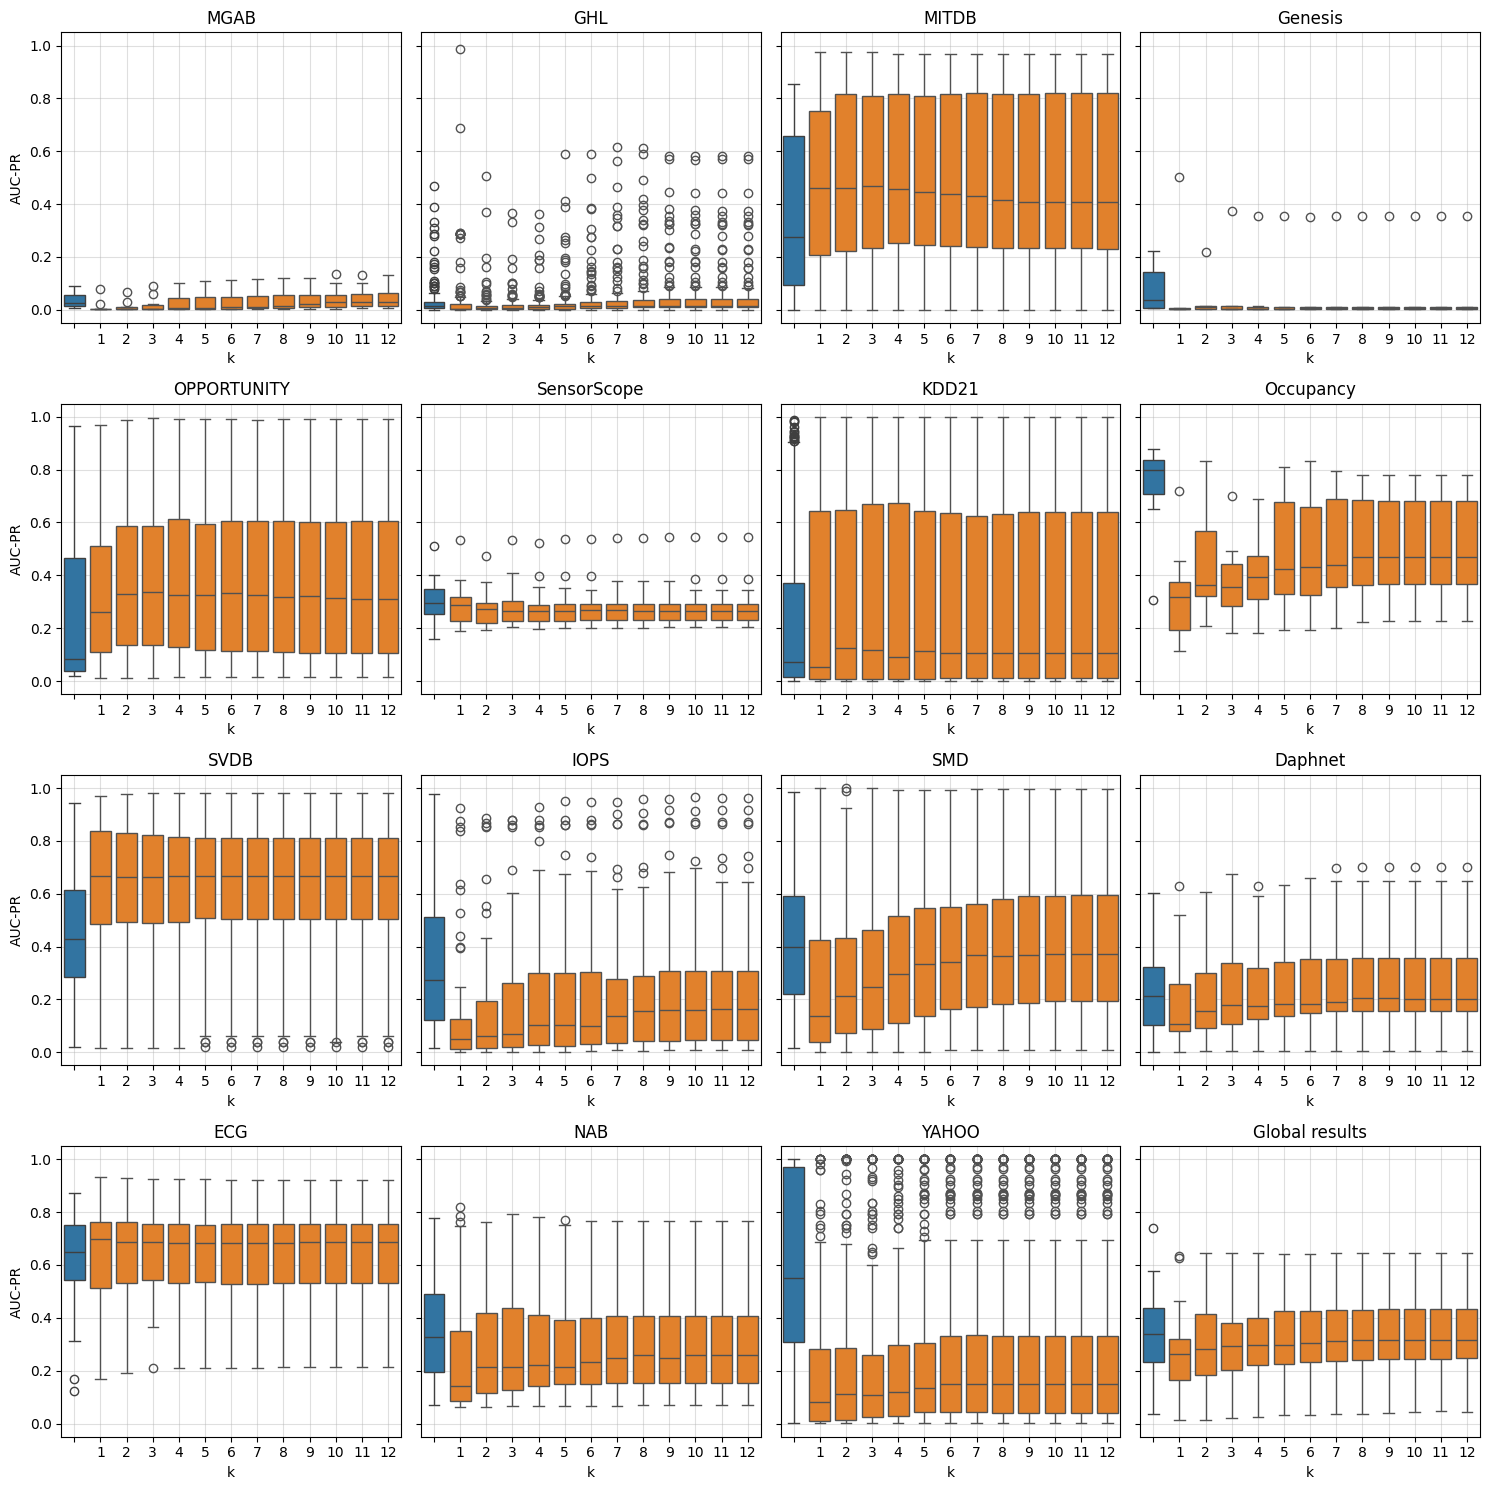

In [14]:
# Plot the AUC-PR values
fig, axes = plt.subplots(4, 4, figsize=(15, 15), sharey=True)
model_selector = [x for x in model_selectors if 'knn' in x][0]
combine_method = 'average'


for i in range (0, len(datasets)):
    curr_data = df[(df["Dataset"] == datasets[i]) & (df["Model Selector"] == model_selector) & (df["Combine Method"] == combine_method)]

    sns.boxplot(ax=axes[i//4, i % 4], data=curr_data[curr_data['k'] == 1], y="AVG_ENS_AUC_PR")
    sns.boxplot(ax=axes[i//4, i % 4], data=curr_data, x="k", y="AUC-PR")

    axes[i//4, i % 4].set(ylabel='AUC-PR')
    axes[i//4, i % 4].grid(alpha=0.4)
    axes[i//4, i % 4].title.set_text(datasets[i])

# Compute global plot
curr_data = df[(df["Model Selector"] == model_selector) & (df["Combine Method"] == combine_method)]
curr_means_df = means_df[(means_df["Model Selector"] == model_selector) & (means_df["Combine Method"] == combine_method)]

sns.boxplot(ax=axes[3, 3], data=avg_ens_means_df, y="AUC-PR")
sns.boxplot(ax=axes[3, 3], data=curr_means_df, x="k", y="AUC-PR")

axes[3, 3].set(ylabel='AUC-PR')
axes[3, 3].grid(alpha=0.4)
axes[3, 3].title.set_text("Global results")

plt.tight_layout()
plt.show()

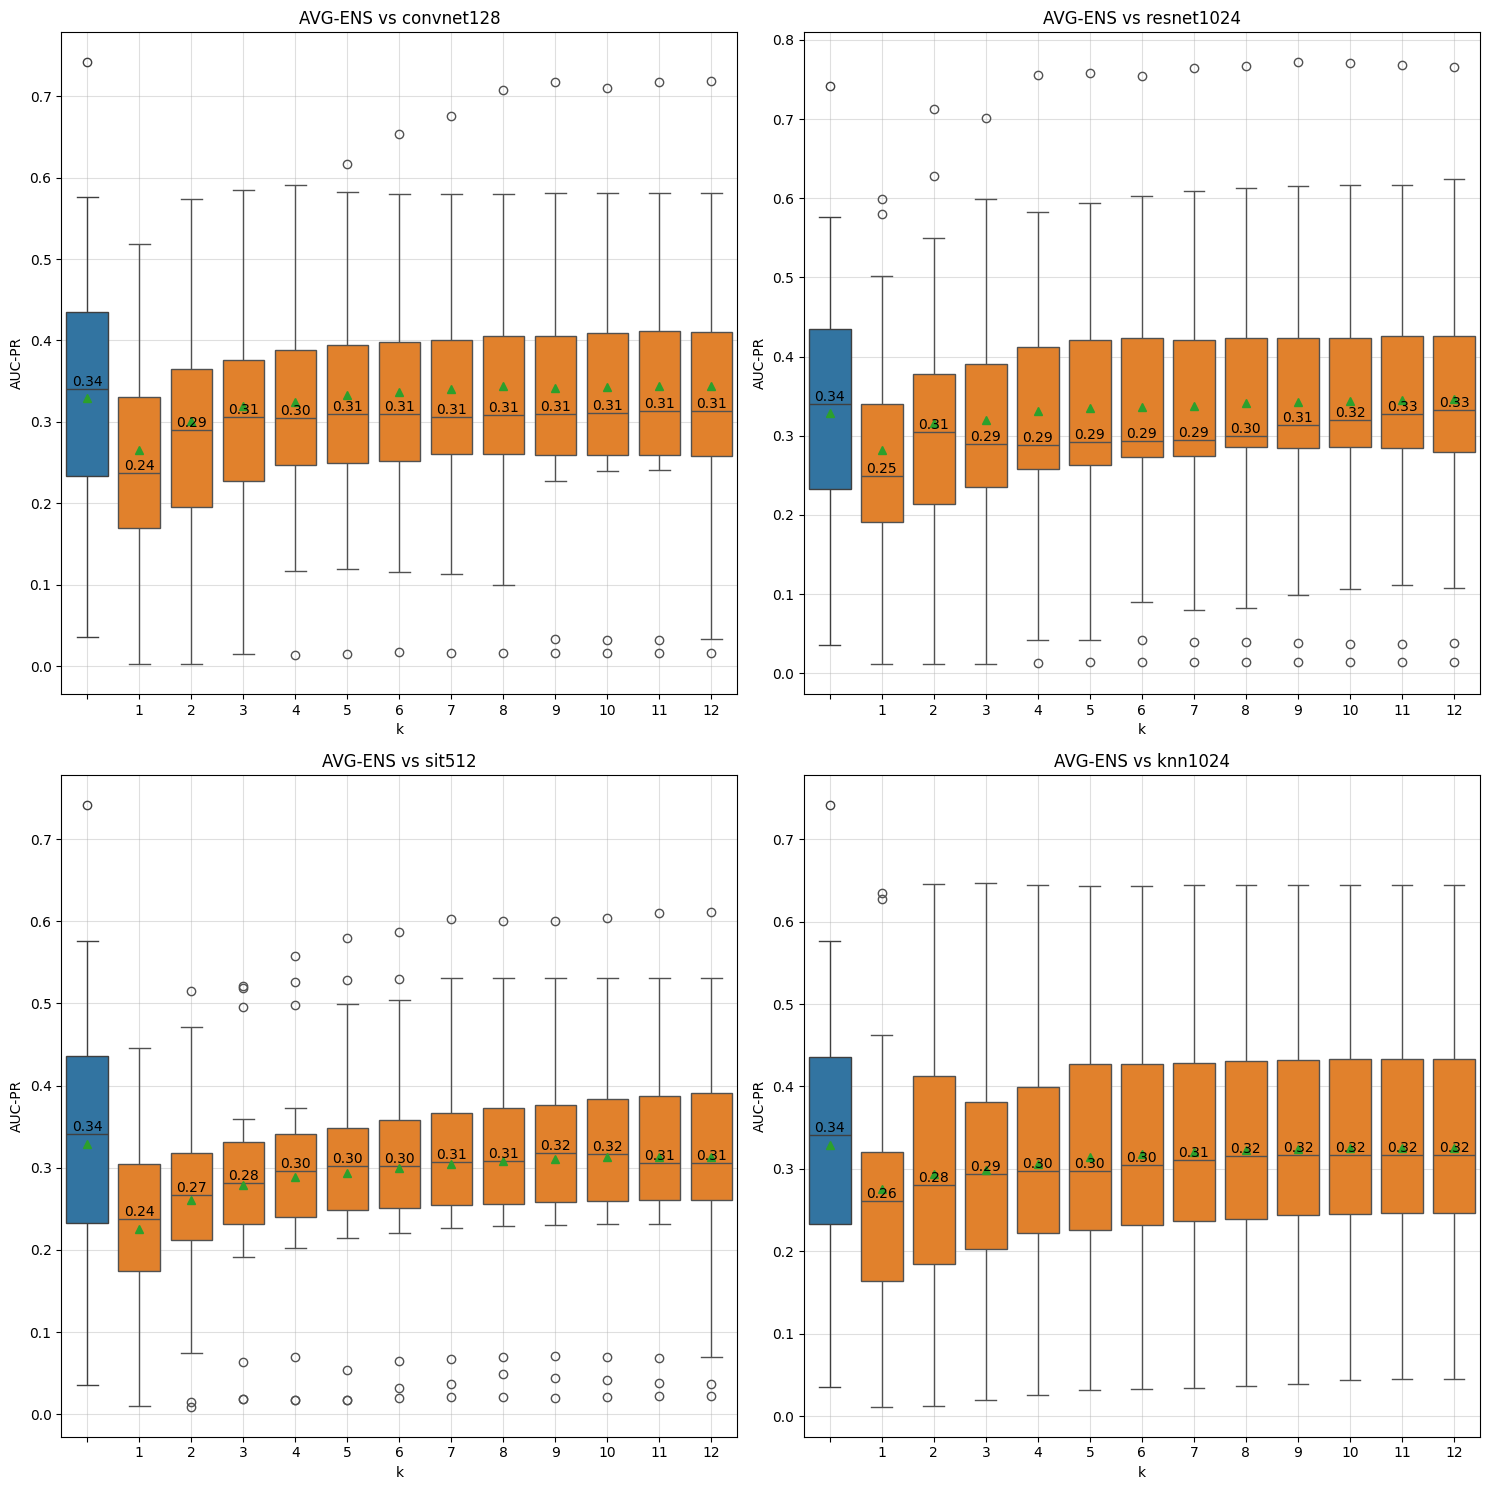

In [59]:
plt.figure(figsize=(15, 15))
for i, model_selector in enumerate(model_selectors):
    combine_method = 'average'
    
    curr_means_df = means_df[(means_df["Model Selector"] == model_selector) & (means_df["Combine Method"] == combine_method)]

    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=avg_ens_means_df, y="AUC-PR", showmeans=True)
    sns.boxplot(data=curr_means_df, x="k", y="AUC-PR", showmeans=True)
    
    max_auc_pr_by_k = curr_means_df.groupby('k')['AUC-PR'].median().reset_index()
    avg_ens_median = avg_ens_means_df['AUC-PR'].median()
    
    plt.text(0, avg_ens_median, f'{avg_ens_median:.2f}', color='black', ha='center', va='bottom', fontsize=10)
    for _, row in max_auc_pr_by_k.iterrows():
        k_value = row['k']
        max_auc_pr = row['AUC-PR']
        plt.text(k_value, max_auc_pr, f'{max_auc_pr:.2f}', color='black', ha='center', va='bottom', fontsize=10)

    plt.grid(alpha=0.4)
    plt.title(f"AVG-ENS vs {model_selector}")
    
plt.tight_layout()
plt.show()

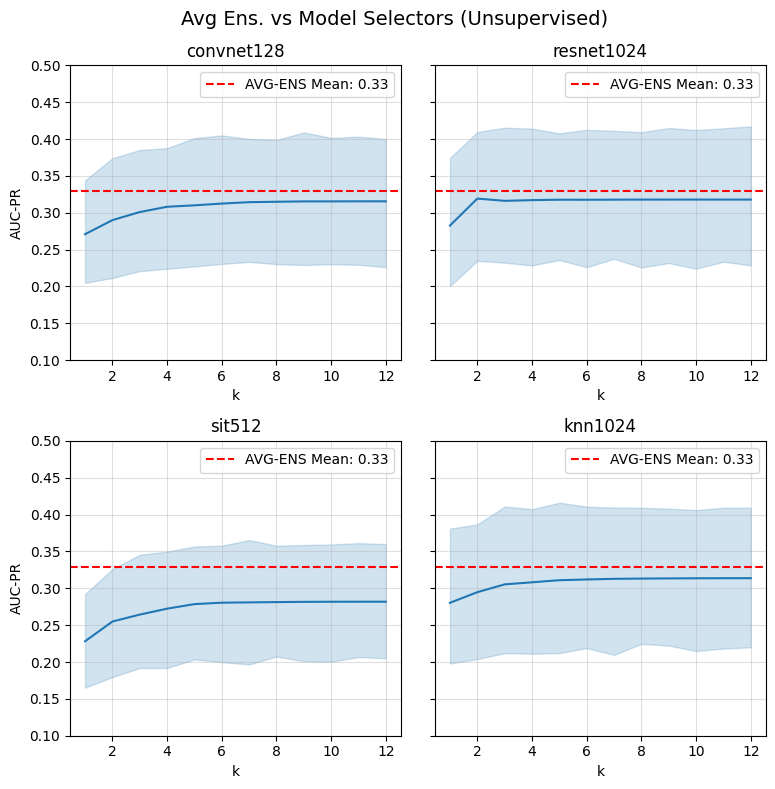

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharey=True)
fig.suptitle("Avg Ens. vs Model Selectors (Unsupervised)", fontsize=14)

# Calculate the average ensemble median value
avg_ens_mean = avg_ens_means_df['AUC-PR'].mean()

# Create subplots
for i, model_selector in enumerate(model_selectors):
    combine_method = 'vote'
    
    curr_means_df = means_df[(means_df["Model Selector"] == model_selector) & (means_df["Combine Method"] == combine_method)]

    ax = axes[i//2, i%2]
    sns.lineplot(data=curr_means_df, x="k", y="AUC-PR", ax=ax)
    
    # Draw a horizontal line for the avg_ens_median value
    ax.axhline(y=avg_ens_mean, color='red', linestyle='dashed', label=f'AVG-ENS Mean: {avg_ens_mean:.2f}')

    ax.grid(alpha=0.4)
    ax.set_yticks(ticks=np.arange(0.1, 0.55, 0.05))
    # ax.set_xticks(ticks=np.arange(1, 13))
    ax.set_title(f"{model_selector}")
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.savefig('/home/sylli/Documents/MSAD-E/reports/figures/global_results_average_unsupervised.svg')
plt.show()